# Regression Model Selection

# Engine Energy Prediction

Step 1:-Importing the dataset

Step2:-Visualizing dataset

Step3:-Data preparation

Step4:-Training the Various Classification algorithm

Step5:-Training The best Model

Step6:-Making Prediction

Step7:Validation the Model

# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step1

# Import Dataset

In [11]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\engine_Energy.csv")

In [12]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [19]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Step2

# Visualise the data

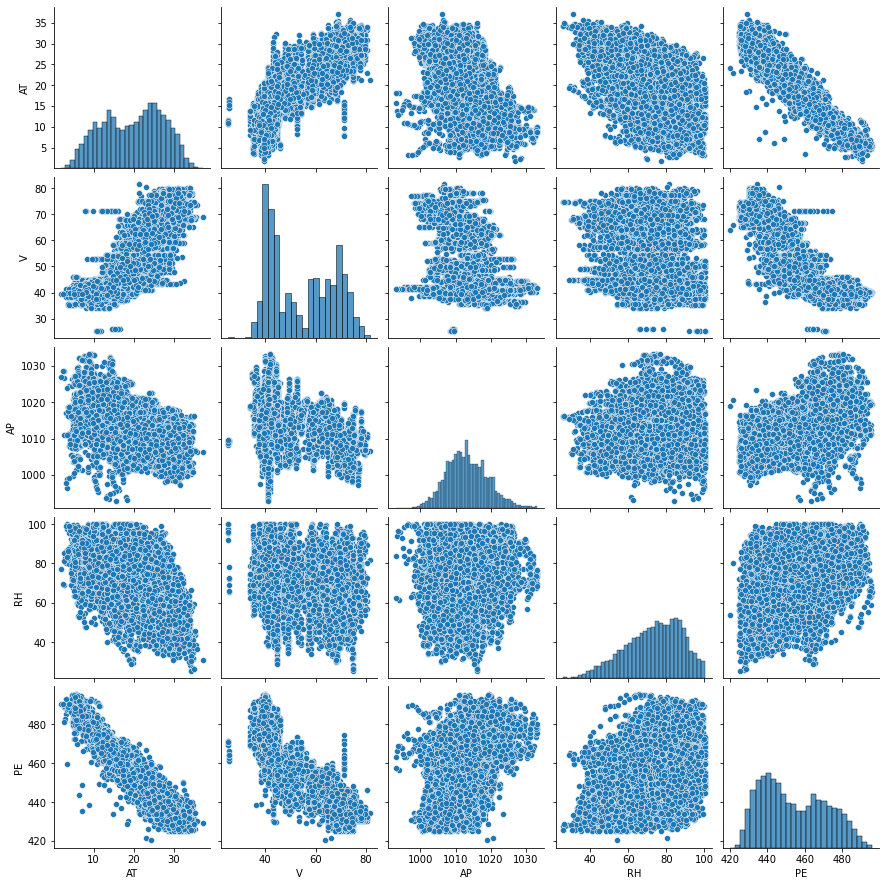

In [13]:
sns.pairplot(df)

Conclusion:
    As we can see that power engine(PE) have linear Relationship with other Regressors(variables in the model.)

<AxesSubplot:>

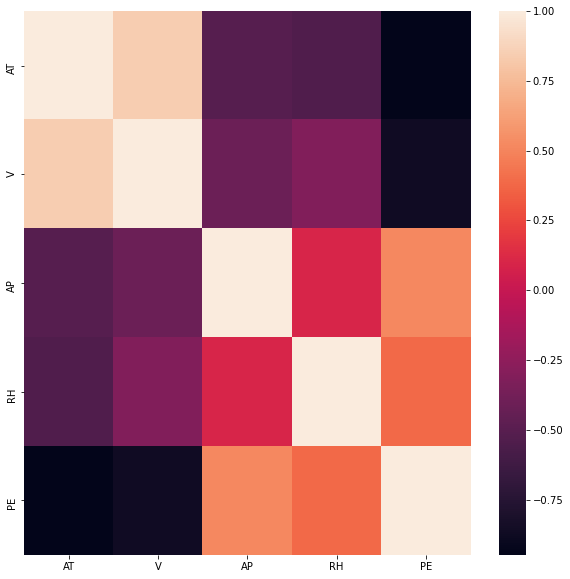

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())


# Step3

# Data Preparation`

# Segregate the Dependent and Independent Variables

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Splitting the Dataset into Training And Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# Step4

# Training the Various Regression Algorithm

## Importing the Regression Algorithms

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

## Initialising  the  Algorithms

In [36]:
poly=PolynomialFeatures()           #Polynomial Regression
X_poly=poly.fit_transform(X_train)
PolyR=LinearRegression()

LR=LinearRegression()              #Linear Regression
 
DTR=DecisionTreeRegressor()        #DecisionTreeRegression

RFR=RandomForestRegressor()        #RandomForestRegression
 
SV=SVR()                           #Support Vector Regression

## Training The Algorithms

In [57]:
PolyR.fit(X_poly,y_train)



LinearRegression()

# Feature Scalling

In [63]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [64]:
LR.fit(X_train,y_train)

LinearRegression()

In [65]:
DTR.fit(X_train,y_train)


DecisionTreeRegressor()

In [66]:
RFR.fit(X_train,y_train)


RandomForestRegressor()

In [67]:
SV.fit(X_train,y_train)

SVR()

# Test Prediction

In [68]:

LR_pred=LR.predict(X_test)
DTR_pred=DTR.predict(X_test)
RFR_pred=RFR.predict(X_test)
SV_pred=SV.predict(X_test)

In [69]:
l=['LR','DTR','RFR','SV']

In [70]:
from sklearn.metrics import r2_score

In [71]:
R2=[]

In [72]:
R2.append(r2_score(y_test,LR_pred))
R2.append(r2_score(y_test,DTR_pred))
R2.append(r2_score(y_test,RFR_pred))
R2.append(r2_score(y_test,SV_pred))




<BarContainer object of 4 artists>

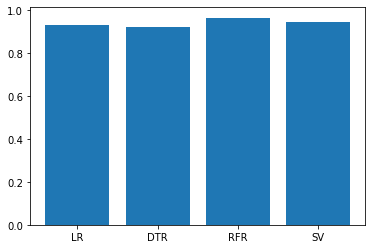

In [73]:
plt.bar(l,R2)

In [74]:
pd.DataFrame({"Models":l,"Accuracy/R^2":R2})

,Models,Accuracy/R^2
0,LR,0.932532
1,DTR,0.922213
2,RFR,0.965198
3,SV,0.943020


Conclusion :
    As we can see that Random Forest Regressor have more Accuracy comparing to others

## Step5

# Training The Best Model

In [77]:
model=RandomForestRegressor(criterion='mse')
model.fit(X_train,y_train)

RandomForestRegressor()

In [78]:
y_pred=model.predict(X_test)

# Step6

# Makking Prediction

In [79]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
4834,431.23,433.2520
1768,460.01,457.4879
2819,461.14,463.5395
7779,445.90,447.0227
7065,451.29,459.9995
...,...,...
6452,460.29,461.0455
794,452.42,453.4204
627,473.26,469.6025
3515,438.00,438.9079


# Step7

# Model Validation

In [81]:
print("Accuracy Score: ",r2_score(y_test,y_pred)*100,"%")

Accuracy Score:  96.48156161440609 %
